In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Upload if running on Colab
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Mall_Customers.csv")
df.head()


Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


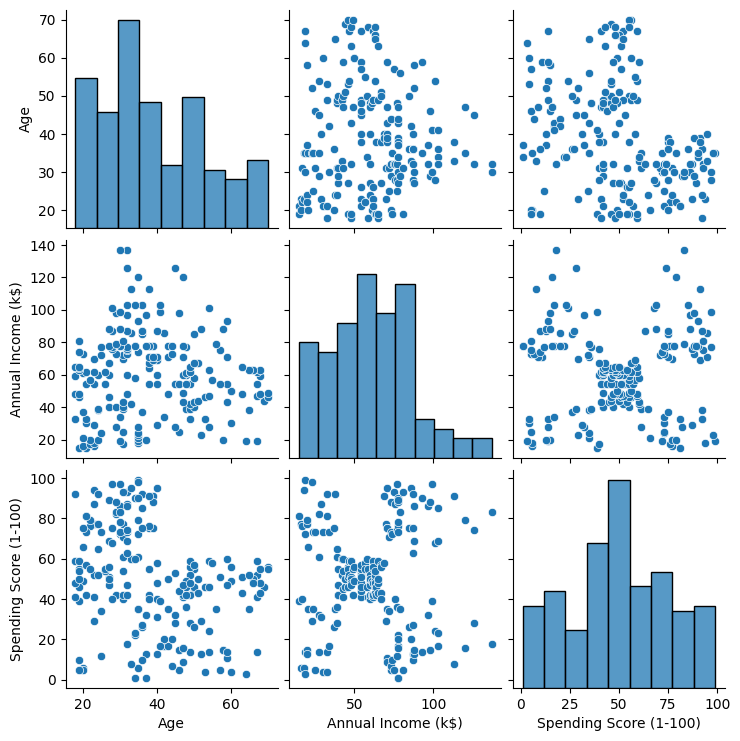

In [3]:
print(df.shape)
print(df.info())
df.describe().T

# Quick visualization
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


In [4]:
# Select numerical features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


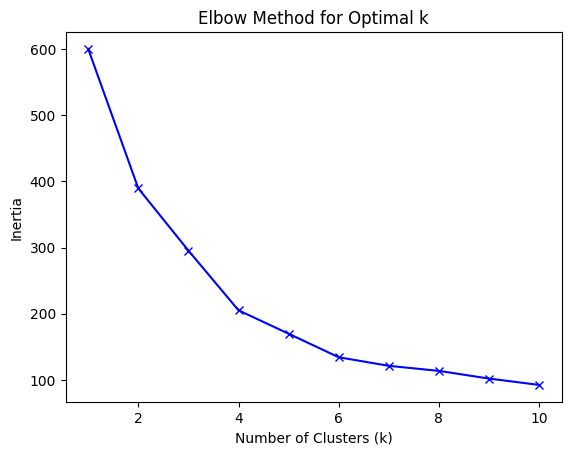

In [5]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [7]:
sil_score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.40846873777345605


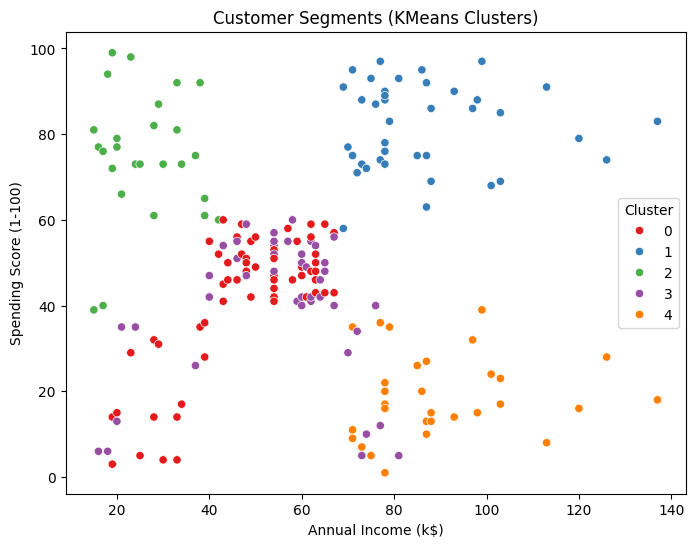

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'],
                palette='Set1')
plt.title("Customer Segments (KMeans Clusters)")
plt.show()


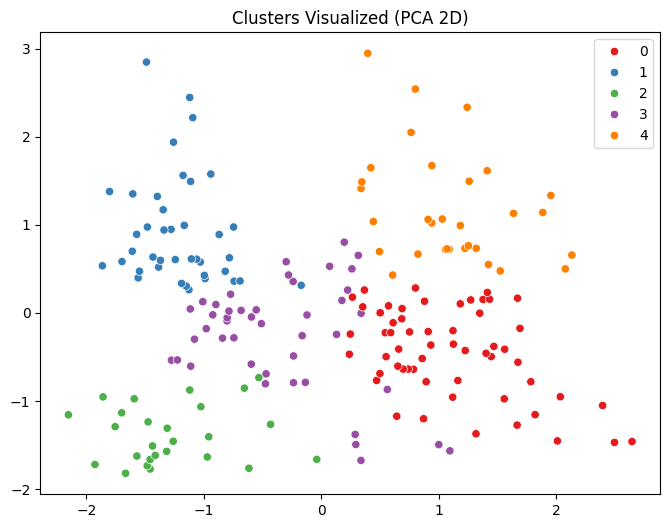

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set1')
plt.title("Clusters Visualized (PCA 2D)")
plt.show()
